# Interactive Data Visualization

In [101]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd

In [102]:
cf.go_offline()

In [117]:
df = pd.read_csv('../data/churn.csv')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'customerID', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'ChurnBinary', 'TenureLevel', 'MonthLevel'],
      dtype='object')

In [118]:
#Interactive Histograms
data1 = df['TotalCharges']
data1.iplot(kind='hist', xTitle='Total Charges', yTitle='Count', 
           title='Total Charges Distribution')

In [119]:
#histnorm argument:
data2 = df.pivot_table(values='MonthlyCharges', columns='InternetService', 
                      index='customerID', aggfunc='sum')

data2.iplot(kind='hist', histnorm='percent', xTitle='Value', 
           yTitle='Percent', title='Monthly Charge by Internet Service')

In [120]:
#subplot feature:
data3 = df.pivot_table(values='MonthlyCharges', columns='PaymentMethod', index='customerID', aggfunc='sum')

data3.iplot(kind='hist', histnorm='percent', xTitle='Value', subplots=True,
yTitle='Percent', title='Monthly Charge by Payment Method')

In [121]:
#Interactive Bar Charts
data4 = df.groupby('PaymentMethod', as_index=False).agg({'ChurnBinary':'mean'})

data4.iplot(kind='bar', x='PaymentMethod', xTitle='Payment Method', color='green',
           yTitle='Avg. Churn %', title='Avg. Churn Rate by Payment Method')

In [125]:
#bars in groups:

gender = df.pivot_table(values='MonthlyCharges', columns='gender', 
                        index='TenureLevel', aggfunc='mean')

senior = df.pivot_table(values='MonthlyCharges', columns='SeniorCitizen', 
                        index='TenureLevel', aggfunc='mean')

partner = df.pivot_table(values='MonthlyCharges', columns='Partner', 
                         index='TenureLevel', aggfunc='mean')

data = pd.concat([gender, senior, partner], axis=1)
data.columns = ['Female', 'Male', 'NonSenior', 'Senior', 'Single', 'Partner']
data = data.reset_index()

custom_dict = {'New': 0, 'Regular': 1, 'Loyal': 2, 'Very Loyal' : 3}  
data = data.iloc[data['TenureLevel'].map(custom_dict).argsort()]

data.iplot(kind='bar', x='TenureLevel', xTitle='Tenure Level', 
           yTitle='Avg. Monthly Charge', title='Avg. Monthly Charge by Demographics')

In [126]:
#Interactive Line Charts
data5 = df.groupby('tenure', as_index=False).agg({'ChurnBinary':'mean'})

data5.iplot(kind='line', x='tenure', xTitle='Tenure', color='blue',
           yTitle='Avg. Churn Rate', title='Avg. Churn Rate by Tenure')

In [127]:
#grouped line chart:

gender = df.pivot_table(values='ChurnBinary', columns='gender', 
                        index='tenure', aggfunc='mean')

senior = df.pivot_table(values='ChurnBinary', columns='SeniorCitizen', 
                        index='tenure', aggfunc='mean')

partner = df.pivot_table(values='ChurnBinary', columns='Partner', 
                         index='tenure', aggfunc='mean')

data = pd.concat([gender, senior, partner], axis=1)
data.columns = ['Female', 'Male', 'NonSenior', 'Senior', 'Single', 'Partner']
data = data.reset_index()

data.iplot(kind='line', x='tenure', xTitle='Tenure', 
           yTitle='Avg. Churn Rate', title='Avg. Churn Rate by Demographics')

In [128]:
#Interactive Scatter Plots
data6 = df[(df['Contract']=='One year') & (df['PaymentMethod']=='Credit card (automatic)')]
data6.iplot(x='tenure', y='TotalCharges', categories='InternetService',
           xTitle='Tenure', yTitle='Total Charges',
           title='Charges vs. Tenure: One Year Contract, Credit Card Customers')

In [138]:
#Interactive Bubble Charts
data7 = df[df['PhoneService']=='No']

data7.iplot(kind='bubble', x='tenure', y='MonthlyCharges', size='TotalCharges',
           categories='gender', xTitle='Tenure', yTitle='Total Charges',
           title='Charges vs. Tenure: One Year Contract, Credit Card Customers')

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [114]:
#Interactive Heatmaps
data = df.pivot_table(values='ChurnBinary', columns='MonthLevel', 
                      index='tenure', aggfunc='mean')
data.iplot(kind='heatmap', colorscale='YlOrRd', xTitle='Tenure', 
           yTitle='Month Level', title='Avg. Churn Rates by Month Level & Tenure')

# Improving Plot Aesthetics

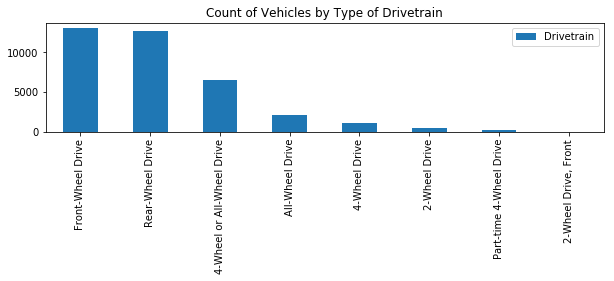

In [139]:
#Adding Titles, Legends and Resizing:
vehicles['Drivetrain'].value_counts().plot(kind="bar", title="Count of Vehicles by Type of Drivetrain", 
                                           figsize=(10, 2), legend=True)

In [140]:
#Colors:
vehicles.Drivetrain.nunique()


8

In [141]:
np.arange(vehicles.Drivetrain.nunique())

array([0, 1, 2, 3, 4, 5, 6, 7])

In [143]:
plt.cm.Paired(np.arange(vehicles.Drivetrain.nunique()))

array([[0.65098039, 0.80784314, 0.89019608, 1.        ],
       [0.12156863, 0.47058824, 0.70588235, 1.        ],
       [0.69803922, 0.8745098 , 0.54117647, 1.        ],
       [0.2       , 0.62745098, 0.17254902, 1.        ],
       [0.98431373, 0.60392157, 0.6       , 1.        ],
       [0.89019608, 0.10196078, 0.10980392, 1.        ],
       [0.99215686, 0.74901961, 0.43529412, 1.        ],
       [1.        , 0.49803922, 0.        , 1.        ]])

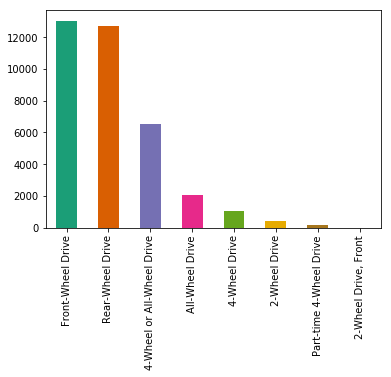

In [144]:
vehicles['Drivetrain'].value_counts().plot(kind="bar", 
                                           color=plt.cm.Dark2(np.arange(vehicles.Drivetrain.nunique())))

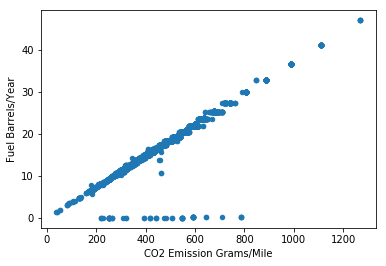

In [145]:
#Customizing Scatter Plots
#Changing the Alpha
vehicles.plot.scatter(x="CO2 Emission Grams/Mile", y="Fuel Barrels/Year")

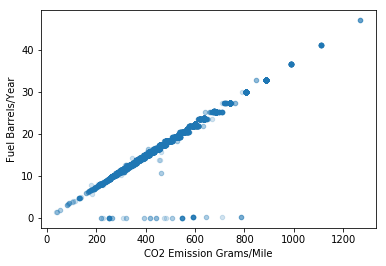

In [146]:
vehicles.plot.scatter(x="CO2 Emission Grams/Mile", y="Fuel Barrels/Year", alpha=0.2)

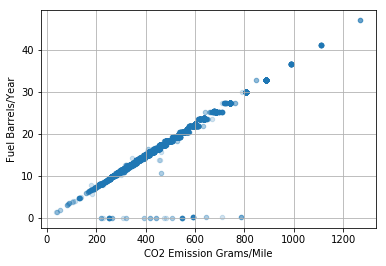

In [147]:
#Adding a Grid
vehicles.plot.scatter(x="CO2 Emission Grams/Mile", y="Fuel Barrels/Year", alpha=0.2, grid=True)